## 使用 scipy

![](https://i.imgur.com/SUftrmC.png)

[參考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html)

In [74]:
from scipy.io import wavfile

# 方法一直接讀取指定音檔
samplerate, data = wavfile.read('test/vad_0.wav')

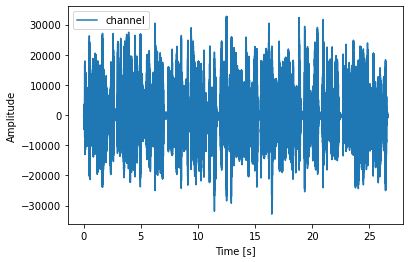

In [76]:
import matplotlib.pyplot as plt
import numpy as np

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [6]:
from scipy.io.wavfile import read
import io

# 方法二讀取二進位檔載入音訊
with open("test/vad_0.wav", "rb") as wavfile:
    binaryfile = wavfile.read()

samplerate, data = read(io.BytesIO(binaryfile))

samplerate, data

(16000, array([-185, -185, -185, ..., -120, -130, -139], dtype=int16))

由於 scipy 讀取二進制音檔後回傳的 data 是沒有經過正規化的，通常會將 waveform 縮放置 0~1 間。以下採用 sklearn 的 MinMaxScaler 將數值縮放到 -1 到 1 之間。

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1)) # 不知為啥 soundfile 是 max=0.999969482421875
scaler.fit_transform(data.reshape(-1,1)).flatten()

array([-0.00563058, -0.00563058, -0.00563058, ..., -0.00364691,
       -0.00395209, -0.00422675])

### 反轉音訊並寫檔
剛剛已經透過 scipy 將檔案讀取成 numpy 格式。接著我們對音檔做個小手腳，翻轉他並將 numpy 格式的 waveform 轉回去二進位檔案，並儲存下來。

[Convert wav in bytes for to numpy ndarray, then back to bytes](https://gist.github.com/hadware/8882b980907901426266cb07bfbfcd20)

In [39]:
from scipy.io.wavfile import read, write

reversed_data = data[::-1] #reversing it
#then, let's save it to a BytesIO object, which is a buffer for bytes object
bytes_wav = bytes()
byte_io = io.BytesIO(bytes_wav)
write(byte_io, samplerate, reversed_data)

output_wav = byte_io.read() # and back to bytes

In [46]:
# 將 bytes 檔案寫檔儲存
newFile = open("recording.wav", "wb")
# write to file
newFile.write(output_wav)

851904

In [48]:
# 如果要存檔最快方法： ndarray -> audio file
with open("recording.wav", "wb") as newFile:
    write(newFile, 16000, reversed_data)

> [何謂二進位的位元組 (Byte)](https://openhome.cc/Gossip/Encoding/TextFile.html)

## 使用 soundfile
如果有多個聲道需要 `data.T` 轉換順序。

[參考](https://librosa.org/doc/latest/ioformats.html#read-file-like-objects)

In [66]:
import soundfile as sf
import io

with open("test/vad_0.wav", "rb") as wavfile:
    binaryfile = wavfile.read()

data, samplerate = sf.read(io.BytesIO(binaryfile))

samplerate, data

(16000,
 array([-0.00564575, -0.00564575, -0.00564575, ..., -0.00366211,
        -0.00396729, -0.00424194]))

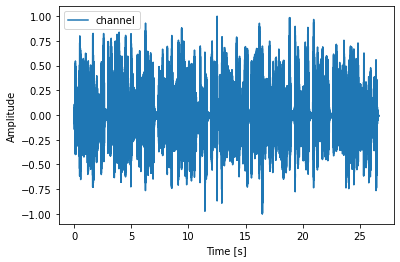

In [3]:
import matplotlib.pyplot as plt
import numpy as np

length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

讀取雲端音檔

In [94]:
import soundfile as sf
import io

from six.moves.urllib.request import urlopen

url = "https://raw.githubusercontent.com/librosa/librosa-test-data/master/test1_44100.wav" # 立體聲(雙聲道)

data, samplerate = sf.read(io.BytesIO(urlopen(url).read()))
data, samplerate

(array([[ 1.83105469e-04, -6.10351562e-05],
        [ 9.15527344e-05, -6.10351562e-05],
        [ 1.52587891e-04,  1.83105469e-04],
        ...,
        [-9.15527344e-05,  6.10351562e-05],
        [-3.05175781e-05,  0.00000000e+00],
        [ 0.00000000e+00,  3.05175781e-05]]),
 44100)

In [95]:
data.shape

(202311, 2)

使用 data 將雙聲道透過平均轉成單聲道輸出

[參考](https://librosa.org/doc/latest/generated/librosa.to_mono.html)

#### 方法一：使用 librosa

In [91]:
import librosa

y_mono = librosa.to_mono(data.T)
y_mono.shape

(202311,)

#### 方法二：使用 numpy

In [100]:
import numpy as np

audio = np.mean(data, axis=1)
audio.shape

(202311,)

## 使用 librosa
- sr: 目標 sampling rate
- mono: 是否轉成單聲道
- offset: 聲音起始位置(秒)
- duration: 欲讀取的時間長度(秒)

In [4]:
import librosa

# filename = librosa.ex('test/vad_0.wav')
y, sr = librosa.load('test/vad_0.wav', sr=16000, mono=False)
y, sr

(array([-0.00564575, -0.00564575, -0.00564575, ..., -0.00366211,
        -0.00396729, -0.00424194], dtype=float32),
 16000)

In [ ]:
import soundfile as sf
import io

with open("test/vad_0.wav", "rb") as wavfile:
    binaryfile = wavfile.read()

y, sr = librosa.load(binaryfile, sr=16000)


## 使用 wavio

In [3]:
import wavio as wv

wav = wv.read("test/vad_0.wav")

wav

Wav(data.shape=(425952, 1), data.dtype=int16, rate=16000, sampwidth=2)

## 語音資料處理: Resampling

![](https://i.imgur.com/9MNtpGj.png)

[Audio - 演算法筆記](https://web.ntnu.edu.tw/~algo/Audio.html)

## 使用 scipy

[參考](scipy.signal.resample)

In [15]:
from scipy.io import wavfile

# 方法一直接讀取指定音檔
samplerate, data = wavfile.read('test/vad_0(441khz).wav')
samplerate, data

(44100, array([-185, -185, -185, ..., -140, -141, -139], dtype=int16))

In [27]:
print(f'轉換前 samplerate({samplerate} Hz) number of samples: {data.shape}')

轉換前 samplerate(44100 Hz) number of samples: (1174031,)


In [28]:
import scipy.signal as sps

# 將原本 441 khz 音訊轉成 160khz
target_sr = 16000
number_of_samples = round(len(data) * float(target_sr) / samplerate)
wav = sps.resample(data, number_of_samples)

In [30]:
print(f'轉換後 samplerate({target_sr} Hz) number of samples: {wav.shape}')

轉換後 samplerate(16000 Hz) number of samples: (425952,)


## 使用 librosa

In [47]:
import librosa

# filename = librosa.ex('test/vad_0.wav')
y, sr = librosa.load('test/vad_0(441khz).wav', sr=44100) # 或是在讀取音檔時 sr 給予 16000
y, sr

(array([-0.00564575, -0.00564575, -0.00564575, ..., -0.00427246,
        -0.00430298, -0.00424194], dtype=float32),
 44100)

In [48]:
print(f'轉換前 samplerate({sr} Hz) number of samples: {y.shape}')

轉換前 samplerate(44100 Hz) number of samples: (1174031,)


In [49]:
# 將原本 441 khz 音訊轉成 160khz
target_sr = 16000
y_160k = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

In [50]:
print(f'轉換後 samplerate({target_sr} Hz) number of samples: {y_160k.shape}')

轉換後 samplerate(16000 Hz) number of samples: (425953,)


## 使用 pydub

In [5]:
from pydub import AudioSegment as am
sound = am.from_file('test/vad_0(441khz).wav', format='wav', frame_rate=44100)
sound = sound.set_frame_rate(16000)
sound.export('output.wav', format='wav')

<_io.BufferedRandom name='output.wav'>